In [23]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sanvijain/Jan'26/data/CustomerChurn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
##EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0, since tenure = 0 ;

In [26]:
df["TotalCharges"]=df["MonthlyCharges"].replace("","0")
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,64.761692
std,0.368612,24.559481,30.090047,30.090047
min,0.000000,0.000000,18.250000,18.250000
25%,0.000000,9.000000,35.500000,35.500000
50%,0.000000,29.000000,70.350000,70.350000
75%,0.000000,55.000000,89.850000,89.850000
max,1.000000,72.000000,118.750000,118.750000


In [30]:
df.duplicated().sum()

np.int64(0)

checking on unique element in data --- customer id

In [31]:
df["customerID"].duplicated().sum()

np.int64(0)

In [32]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,56.95,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,53.85,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,42.30,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,70.70,Yes


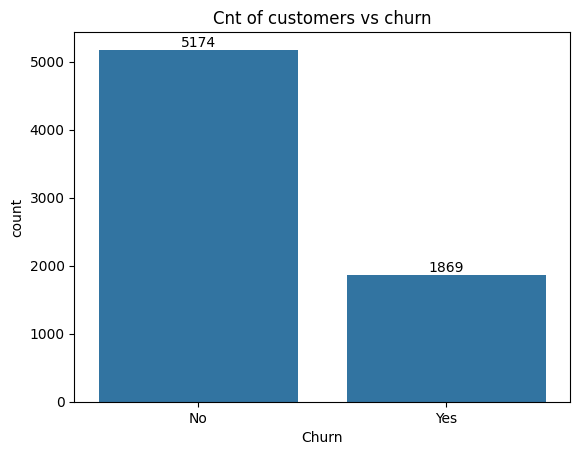

In [33]:
ax = sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Cnt of customers vs churn")
plt.show()

([<matplotlib.patches.Wedge at 0x114276510>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.46%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.54%')])

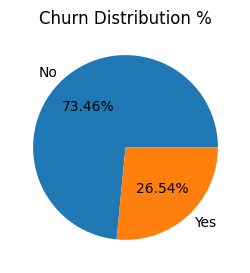

In [34]:
plt.figure(figsize=(3,3))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.title("Churn Distribution %")
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')

<Axes: xlabel='gender', ylabel='count'>

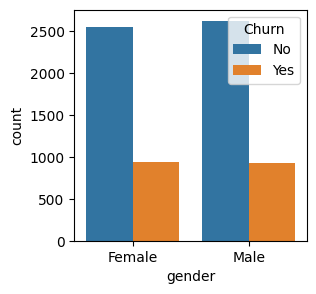

In [35]:
### 26% customers churned out... reason??
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data=df, hue = "Churn")
### not gender specific

<Axes: xlabel='SeniorCitizen', ylabel='count'>

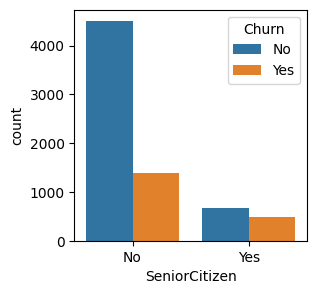

In [36]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen", data=df, hue = "Churn")

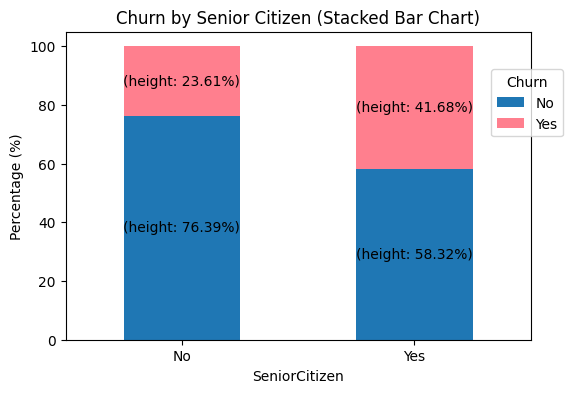

In [37]:
total_counts = df.groupby('SeniorCitizen')[ 'Churn'].value_counts(normalize=True).unstack()*100
fig,ax = plt.subplots(figsize=(6,4))
# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f8e']) 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'(height: {height:.2f}%)', ha='center', va='center')
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(.9,.9)) # Customize Legend Location
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

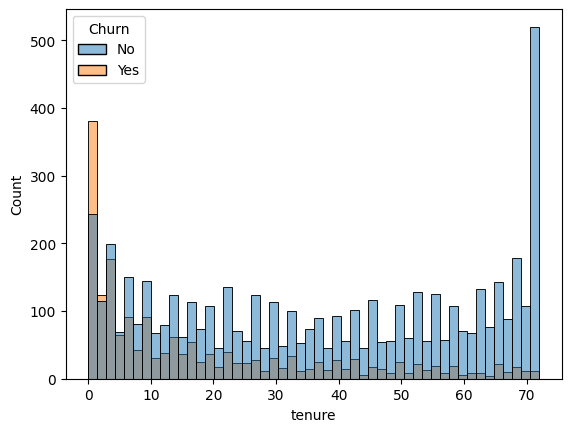

In [38]:
sns.histplot(x= "tenure", data=df, bins=50, hue="Churn")

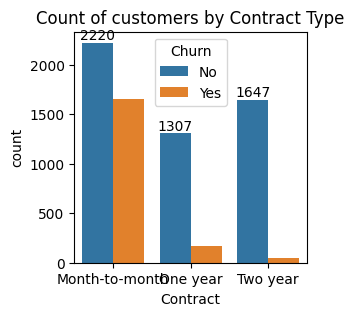

In [41]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x="Contract", data=df, hue="Churn")

# Add count labels on the bars
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract Type")
plt.show()

month to month contract customers more likely to churn

long time users stayed; 1/2 month users churned(opted out)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

CREATING SUBPLOTS OF THESE FEATURES
       PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'

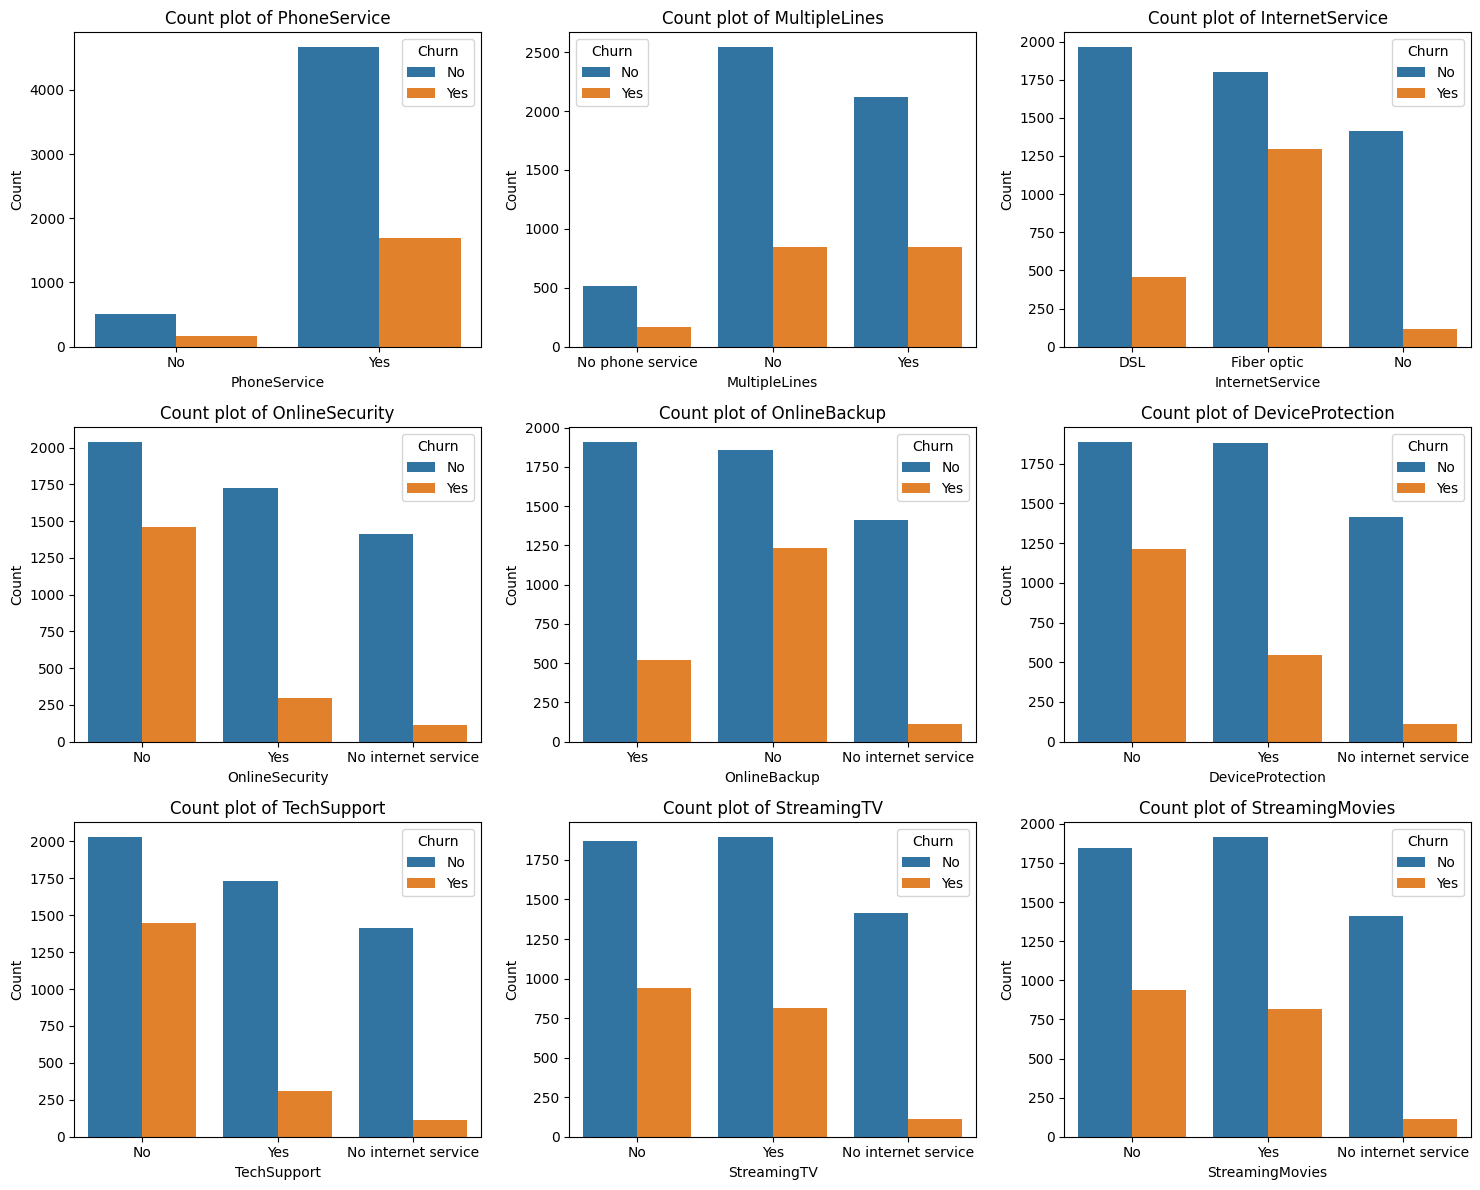

In [48]:
# List of columns for which we want to create count plots
columns = ['PhoneService', "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # calculate number of rows needed
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figsize as needed
# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()
# Iterate over columns and plot count plots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f"Count plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
# Remove empty subplots (If any)
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

fiberoptic, multiple lines have high churn likelihood
not using online backup churn hmmm


Customers with **fiber optic internet** show the highest churn rates, while those with **add-on services** (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) demonstrate significantly better retention. 

The data reveals that customers subscribing to fewer value-added services are more likely to churn, suggesting these services create stronger customer loyalty. Overall, service bundling appears to be a key factor in reducing customer attrition.

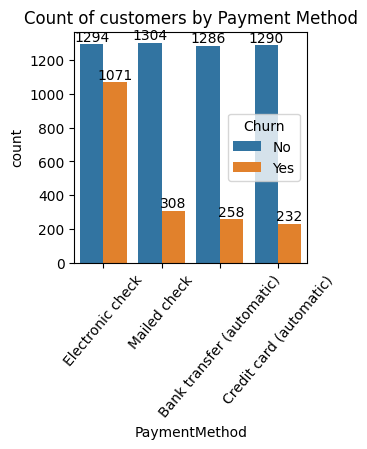

In [55]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")

# Add count labels on the bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xticks(rotation=50)
plt.title("Count of customers by Payment Method")
plt.show()

ELECTRONIC CHECK as payment method has high churn rate

***Core Churn Drivers***


A. Contract Type & Tenure
Month-to-month customers churn the most, especially within the first 1–3 months.
Long-term contracts show structurally lower churn, confirming commitment duration reduces exit probability.
Insight: Churn is fundamentally an early-lifecycle failure.

B. Service Type (Fiber Optic Risk Segment)
Fiber users churn more than DSL users, despite higher ARPU.
Indicates expectation–delivery mismatch rather than pure price sensitivity.
Likely causes: reliability issues, onboarding gaps, or poor support escalation.

C. Value Perception via Bundling
Customers without add-on services (security, backup, tech support) churn at higher rates.
Bundled users exhibit lower churn due to higher perceived value and switching costs.
Insight: Retention improves when the product feels “complete.”

D. Payment Method as Commitment Signal
Electronic check users churn significantly more than auto-pay or card users.
Payment behavior reflects customer intent and engagement, not just convenience.